
💡 **Question 1**

Given two strings s1 and s2, return *the lowest **ASCII** sum of deleted characters to make two strings equal*.

**Example 1:**

**Input:** s1 = "sea", s2 = "eat"

**Output:** 231

**Explanation:** Deleting "s" from "sea" adds the ASCII value of "s" (115) to the sum.

Deleting "t" from "eat" adds 116 to the sum.

At the end, both strings are equal, and 115 + 116 = 231 is the minimum sum possible to achieve this.



In [ ]:
class Solution:
    def minimumDeleteSum(self, s1: str, s2: str) -> int:
        rows = len(s1)
        cols = len(s2)

        dp = [[0] * (cols + 1) for _ in range(rows + 1)]

        for i in range(1, rows + 1):
            dp[i][0] = dp[i - 1][0] + ord(s1[i - 1])

        for j in range(1, cols + 1):
            dp[0][j] = dp[0][j - 1] + ord(s2[j - 1])

        for i in range(1, rows + 1):
            for j in range(1, cols + 1):
                if s1[i - 1] == s2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1]
                else:
                    dp[i][j] = min(ord(s1[i - 1]) + dp[i - 1][j], ord(s2[j - 1]) + dp[i][j - 1])

        return dp[-1][-1]
link:https://leetcode.com/problems/minimum-ascii-delete-sum-for-two-strings/description/


💡 **Question 2**

Given a string s containing only three types of characters: '(', ')' and '*', return true *if* s *is **valid***.

The following rules define a **valid** string:

- Any left parenthesis '(' must have a corresponding right parenthesis ')'.
- Any right parenthesis ')' must have a corresponding left parenthesis '('.
- Left parenthesis '(' must go before the corresponding right parenthesis ')'.
- '*' could be treated as a single right parenthesis ')' or a single left parenthesis '(' or an empty string "".

**Example 1:**

**Input:** s = "()"

**Output:**

true



In [ ]:
class Solution:
    def checkValidString(self, s: str) -> bool:
        leftMin, leftMax = 0, 0

        for c in s:
            if c == "(":
                leftMin += 1
                leftMax += 1
            elif c == ")":
                leftMin -= 1
                leftMax -= 1
            else:
                leftMin -= 1
                leftMax += 1
            
            if leftMax < 0:
                return False
            elif leftMin < 0:
                leftMin = 0
        
        return leftMin == 0
link:https://leetcode.com/problems/valid-parenthesis-string/description/


💡 **Question 3**

Given two strings word1 and word2, return *the minimum number of **steps** required to make* word1 *and* word2 *the same*.

In one **step**, you can delete exactly one character in either string.

**Example 1:**

**Input:** word1 = "sea", word2 = "eat"

**Output:** 2

**Explanation:** You need one step to make "sea" to "ea" and another step to make "eat" to "ea".



In [ ]:
class Solution:
    def minDistance(self, word1: str, word2: str) -> int:
        m = len(word1)
        n = len(word2)
        a = []
        for i in range(m+1):
            a.append([])
            for j in range(n+1):
                a[-1].append(0)
        
        for i in range(m):
            for j in range(n):
                if word1[i]==word2[j]:
                    a[i+1][j+1] = 1 + a[i][j]
                else:
                    a[i+1][j+1] = max( a[i][j+1], a[i+1][j])

        return m + n - ( 2 * a [-1][-1] )
https://leetcode.com/problems/delete-operation-for-two-strings/description/

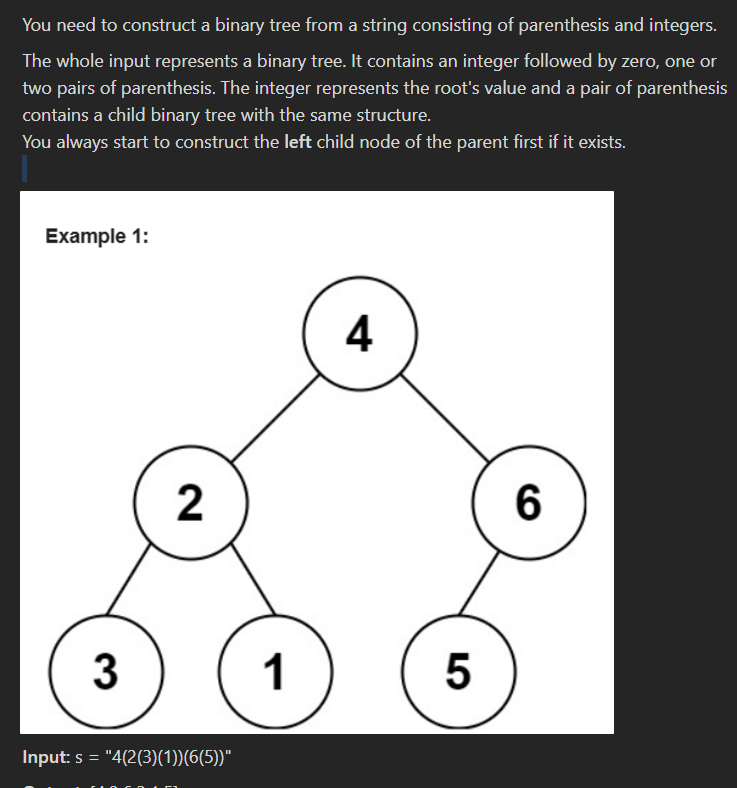

In [ ]:
# Python3 program to conStruct a
# binary tree from the given String

# Helper class that allocates a new node


class newNode:
    def __init__(self, data):
        self.data = data
        self.left = self.right = None

# This function is here just to test


def preOrder(node):
    if (node == None):
    return
    print(node.data, end=' ')
    preOrder(node.left)
    preOrder(node.right)

# function to return the index of
# close parenthesis


def findIndex(Str, si, ei):
    if (si > ei):
        return -1

# Inbuilt stack
    s = []
    for i in range(si, ei + 1):

# if open parenthesis, push it
        if (Str[i] == '('):
            s.append(Str[i])

# if close parenthesis
        elif (Str[i] == ')'):
            if (s[-1] == '('):
                s.pop(-1)

# if stack is empty, this is
# the required index
                if len(s) == 0:
                     return i
# if not found return -1
     return -1

# function to conStruct tree from String


def treeFromString(Str, si, ei):

	# Base case
	if (si > ei):
		return None

	# new root
	root = newNode(ord(Str[si]) - ord('0'))
	index = -1

	# if next char is '(' find the
	# index of its complement ')'
	if (si + 1 <= ei and Str[si + 1] == '('):
		index = findIndex(Str, si + 1, ei)

	# if index found
	if (index != -1):

		# call for left subtree
		root.left = treeFromString(Str, si + 2,
								index - 1)

		# call for right subtree
		root.right = treeFromString(Str, index + 2,
									ei - 1)
	return root


link:https://www.geeksforgeeks.org/construct-binary-tree-string-bracket-representation/


💡 **Question 5**

Given an array of characters chars, compress it using the following algorithm:

Begin with an empty string s. For each group of **consecutive repeating characters** in chars:

- If the group's length is 1, append the character to s.
- Otherwise, append the character followed by the group's length.

The compressed string s **should not be returned separately**, but instead, be stored **in the input character array chars**. Note that group lengths that are 10 or longer will be split into multiple characters in chars.

After you are done **modifying the input array,** return *the new length of the array*.

You must write an algorithm that uses only constant extra space.

**Example 1:**

**Input:** chars = ["a","a","b","b","c","c","c"]

**Output:** Return 6, and the first 6 characters of the input array should be: ["a","2","b","2","c","3"]

**Explanation:**

The groups are "aa", "bb", and "ccc". This compresses to "a2b2c3".



In [ ]:
class Solution:
    def compress(self, chars: List[str]) -> int:
        s = ""
        point1 = 0
        point2 = 1
        # chars = ["a","b","b"]

        if len(chars)==1:
            return len(chars)
        for i in range(1,len(chars)):

            # print(chars[i])
            if chars[point1] == chars[i]:
                # print(chars[i])
                # print(i,chars[i])
                point2 += 1
                # print(point2)
                if(i==len(chars)-1):
                    s+=chars[len(chars)-1]+str(point2)
                    
            elif chars[point1]!= chars[i]:
                if(point2!=1):
                    s += chars[point1] + str(point2)
                else:
                    s+=chars[point1]
                
                point1 = i
                point2 = 1
                
                if(i==len(chars)-1):
                    if(point2!=1):
                        s+=chars[len(chars)-1]+str(point2)
                    else:
                        s+=chars[len(chars)-1]
                        
                    
        for i in range(len(s)):
            chars[i]=s[i]
        return len(s)
        # print(s)
https://leetcode.com/problems/string-compression/description/


💡 **Question 6**

Given two strings s and p, return *an array of all the start indices of* p*'s anagrams in* s. You may return the answer in **any order**.

An **Anagram** is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

**Example 1:**

**Input:** s = "cbaebabacd", p = "abc"

**Output:** [0,6]

**Explanation:**

The substring with start index = 0 is "cba", which is an anagram of "abc".

The substring with start index = 6 is "bac", which is an anagram of "abc".


In [ ]:
class Solution:
    def findAnagrams(self, s: str, p: str) -> List[int]:
        window = len(p)
        mapper = {}
        def __mapper():
            nonlocal mapper
            for i in p:
                if i in mapper.keys(): mapper[i] += 1
                else: mapper[i] = 1
        __mapper()
        ans = []
        st = 0
        ed = 0
        while ed < len(s):
            if s[ed] in mapper.keys():
                mapper[s[ed]] -= 1
                if mapper[s[ed]] == 0:
                    del mapper[s[ed]]
                if not bool(mapper):
                    ans.append(st)
                    mapper[s[st]] = 1
                    st += 1
                ed += 1
            else:
                if st == ed:
                    st = ed = ed + 1
                else:
                    if s[st] in mapper.keys():
                        mapper[s[st]] += 1
                    else:
                        mapper[s[st]] = 1
                    st += 1
        return ans           
https://leetcode.com/problems/find-all-anagrams-in-a-string/description/


💡 **Question 7**

Given an encoded string, return its decoded string.

The encoding rule is: k[encoded_string], where the encoded_string inside the square brackets is being repeated exactly k times. Note that k is guaranteed to be a positive integer.

You may assume that the input string is always valid; there are no extra white spaces, square brackets are well-formed, etc. Furthermore, you may assume that the original data does not contain any digits and that digits are only for those repeat numbers, k. For example, there will not be input like 3a or 2[4].

The test cases are generated so that the length of the output will never exceed 105.

**Example 1:**

**Input:** s = "3[a]2[bc]"

**Output:** "aaabcbc"



In [ ]:
        def helper(i,n,l):
            if i>=len(s):
                return ""

            if s[i]=="]":
                l[0] = i #we keep track where we left
                return ""

            if s[i]=="[":
                return int(n)*helper(i+1,"",l)+helper(l[0]+1,"",l)

            if s[i].isnumeric():
                return helper(i+1,n+s[i],l)

            else:
                return s[i]+helper(i+1,n,l)

        l = [0]
        return helper(0,"",l)
```
link :https://leetcode.com/problems/decode-string/description/


💡 **Question 8**

Given two strings s and goal, return true *if you can swap two letters in* s *so the result is equal to* goal*, otherwise, return* false*.*

Swapping letters is defined as taking two indices i and j (0-indexed) such that i != j and swapping the characters at s[i] and s[j].

- For example, swapping at indices 0 and 2 in "abcd" results in "cbad".

**Example 1:**

**Input:** s = "ab", goal = "ba"

**Output:** true

**Explanation:** You can swap s[0] = 'a' and s[1] = 'b' to get "ba", which is equal to goal.



In [ ]:
class Solution:
    def buddyStrings(self, s: str, goal: str) -> bool:
        n = len(s)
        if s == goal:
            temp = set(s)
            return len(temp) < len(goal)  # Swapping same characters

        i = 0
        j = n - 1

        while i < j and s[i] == goal[i]:
            i += 1

        while j >= 0 and s[j] == goal[j]:
            j -= 1

        if i < j:
            s_list = list(s)
            s_list[i], s_list[j] = s_list[j], s_list[i]
            s = ''.join(s_list)

        return s == goal
https://leetcode.com/problems/buddy-strings/description/